In [3]:
from pycaret.datasets import get_data
import pandas as pd

dataset = pd.read_csv('../historical/_summary/FPL_data.csv')
print(dataset.tail(10))
print(dataset.shape) #407, 13

FileNotFoundError: [Errno 2] No such file or directory: '../historical/_summary/FPL_data.csv'

In [2]:
data = dataset.sample(frac=0.88, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (358, 13)
Unseen Data For Predictions: (49, 13)


In [27]:
from pycaret.regression import *
s = setup(data = data, target = 'roi', session_id=7177)
print(s)

,Description,Value
0,Session id,7177
1,Target,roi
2,Target type,Regression
3,Original data shape,"(358, 12)"
4,Transformed data shape,"(358, 33)"
5,Transformed train set shape,"(250, 33)"
6,Transformed test set shape,"(108, 33)"
7,Numeric features,9
8,Categorical features,2
9,Preprocess,True


In [28]:
best = compare_models()


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:22:54
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6157,0.8876,0.9203,0.9830,0.1046,0.1256,0.1220
gbr,Gradient Boosting Regressor,0.6383,0.9312,0.9400,0.9815,0.0683,0.0701,0.0110
ridge,Ridge Regression,0.8307,1.2850,1.1099,0.9748,0.2017,0.2609,0.0060
br,Bayesian Ridge,0.8348,1.2923,1.1135,0.9746,0.1984,0.2631,0.0050
lr,Linear Regression,0.8367,1.3100,1.1183,0.9744,0.2061,0.2596,0.3840
et,Extra Trees Regressor,0.7606,1.3265,1.1192,0.9738,0.0857,0.0925,0.0170
rf,Random Forest Regressor,0.7586,1.3392,1.1333,0.9730,0.0773,0.0714,0.0270
ada,AdaBoost Regressor,1.0453,2.1038,1.4223,0.9584,0.1806,0.2619,0.0100
dt,Decision Tree Regressor,0.9592,2.4380,1.5210,0.9520,0.0965,0.0839,0.0050
huber,Huber Regressor,1.0106,2.5181,1.5192,0.9489,0.1277,0.1528,0.0070


In [17]:
lightgbm = create_model('lightgbm')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:15:55
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0117,1.5733,1.2543,0.9717,0.2021,0.2557
1,0.8910,1.0942,1.0460,0.9730,0.1771,0.2947
2,1.0190,1.6919,1.3007,0.9619,0.3518,0.8553
3,1.3303,2.6606,1.6311,0.9577,0.4173,1.2325
4,0.8146,0.9743,0.9871,0.9843,0.1612,0.1851
5,0.9781,1.5892,1.2606,0.9635,0.2204,0.2525
6,1.2998,3.1123,1.7642,0.9369,0.1090,0.0986
7,1.1990,2.0137,1.4191,0.9630,0.2818,0.5656
8,1.0234,3.1998,1.7888,0.9198,0.0886,0.0741


In [29]:
lightgbm = create_model('lightgbm')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:24:29
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6143,0.7564,0.8697,0.9886,0.1442,0.2369
1,0.6914,1.5250,1.2349,0.9803,0.1599,0.1880
2,0.8281,1.2927,1.1370,0.9716,0.0763,0.0740
3,0.6073,0.5741,0.7577,0.9856,0.1005,0.1566
4,0.5426,0.6151,0.7843,0.9858,0.0886,0.0795
5,0.4068,0.5441,0.7377,0.9889,0.0869,0.0773
6,0.4618,0.3759,0.6131,0.9916,0.0940,0.1230
7,0.7700,1.3722,1.1714,0.9689,0.0618,0.0526
8,0.5580,0.7138,0.8449,0.9888,0.1325,0.1981


In [18]:
tuned_huber = tune_model(huber)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:16:09
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:16:09
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Huber Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2321,2.0864,1.4444,0.9625,0.2938,0.3990
1,0.8727,1.0801,1.0393,0.9733,0.1669,0.2836
2,1.0974,1.9567,1.3988,0.9560,0.3823,0.9324
3,1.2173,2.7180,1.6486,0.9568,0.3034,0.7867
4,0.8242,0.9768,0.9883,0.9843,0.1864,0.2096
5,0.9414,1.6100,1.2689,0.9630,0.1501,0.1649
6,1.2096,2.8104,1.6764,0.9430,0.1073,0.0980
7,1.2886,2.3207,1.5234,0.9573,0.2836,0.5685
8,1.0589,1.9215,1.3862,0.9519,0.0903,0.0855


In [31]:
tuned_lightgbm = tune_model(lightgbm)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:25:07
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:25:07
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:25:07
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Results
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6924,0.9104,0.9541,0.9863,0.2252,0.4525
1,0.9243,1.8419,1.3572,0.9762,0.1809,0.2009
2,1.0443,1.6581,1.2877,0.9636,0.0872,0.0907
3,0.7888,0.8779,0.9369,0.9780,0.0977,0.1659
4,0.6867,0.7664,0.8755,0.9822,0.1247,0.1133
5,0.7761,0.8484,0.9211,0.9826,0.1212,0.1175
6,0.5393,0.6083,0.7799,0.9864,0.0925,0.1471
7,1.0384,2.0047,1.4159,0.9546,0.0860,0.0778
8,0.6463,0.7932,0.8906,0.9876,0.1157,0.2042


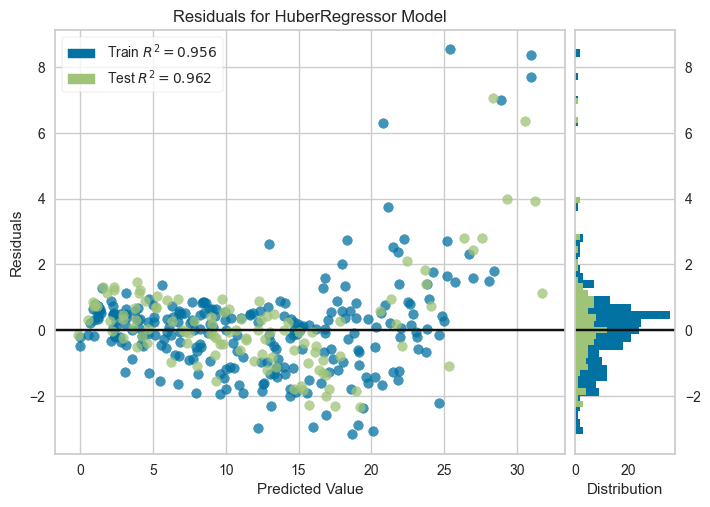

In [19]:
plot_model(tuned_huber)

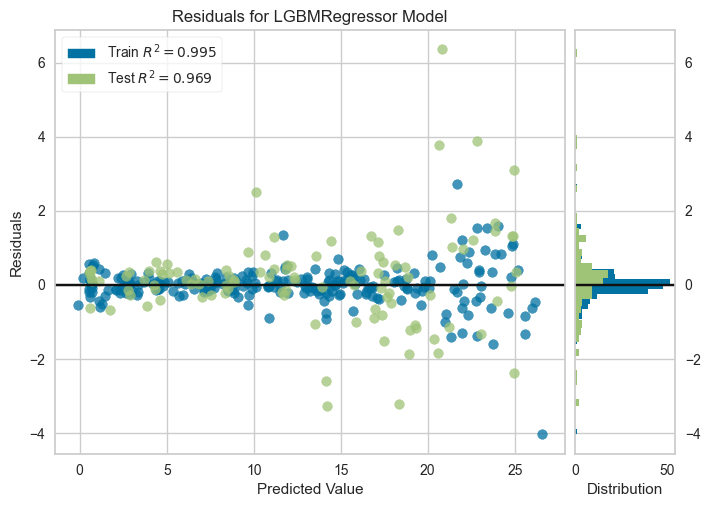

In [32]:
plot_model(tuned_lightgbm)

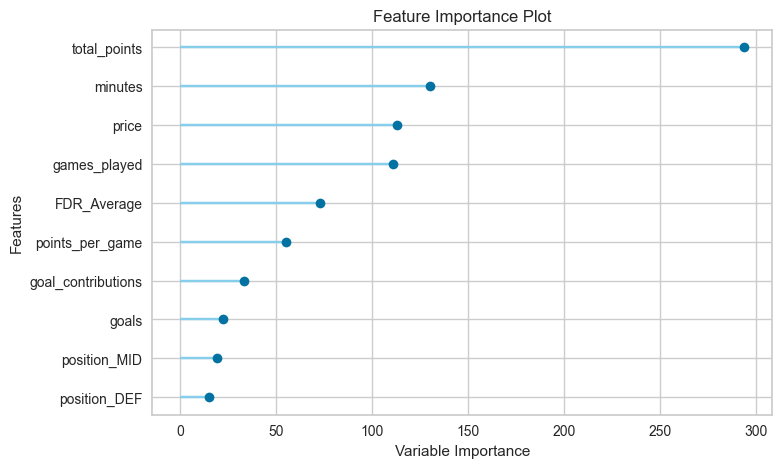

In [33]:
plot_model(tuned_lightgbm, plot='feature')

In [34]:
final_lightgbm = finalize_model(tuned_huber)

In [ ]:
print(final_lightgbm)

In [35]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head(100)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.4978,0.8436,0.9185,0.9846,0.0562,0.0652


,price,team,goals,assists,goal_contributions,games_played,minutes,total_points,points_per_game,position,FDR_Average,roi,prediction_label
0,5.0,Arsenal,0,2,2,10,913,44,1.8,MID,12.666667,8.800000,8.455327
1,6.5,Arsenal,4,5,9,35,2987,182,4.9,DEF,12.666667,28.000000,24.310141
2,5.0,Aston Villa,2,0,2,23,2085,66,2.2,MID,5.298245,13.200000,13.434826
3,5.0,Bournemouth,0,0,0,1,118,5,1.7,MID,-1.719298,1.000000,1.218689
4,5.0,Bournemouth,0,3,3,32,2787,77,2.3,MID,-1.719298,15.400000,15.587127
5,5.0,Bournemouth,1,2,3,12,1214,56,1.9,MID,-1.719298,11.200000,10.527431
6,4.5,Brentford,2,0,2,28,2521,77,2.7,DEF,-4.877193,17.110001,16.843166
7,5.5,Brentford,2,2,4,3,327,33,3.0,MID,-4.877193,6.000000,6.199978
8,4.0,Brighton,0,0,0,3,307,5,0.8,DEF,-1.719298,1.250000,1.404017
9,4.5,Brighton,3,1,4,33,2869,89,2.7,DEF,-1.719298,19.780001,18.845679
